## Zadanie 3
Obserwacja widma sygnału EKG.

EKG (elektrokardiografia) to badanie wykorzystywane w celu diagnostyki chorób serca. Sygnał EKG zawiera w sobie informację o natężeniu napięcia elektrycznego w wybranym punkcie czasu.

In [7]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

In [8]:
def plot(time, amplitudes, title, xlabel, ylabel):
    fig = plt.figure(figsize=(8,5))
    ax = plt.axes()
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    ax.plot(time, amplitudes)
    plt.show()

### 1. Wczytać sygnał ecg100.txt i ocenić go wizualnie na wykresie.

<IPython.core.display.Javascript object>


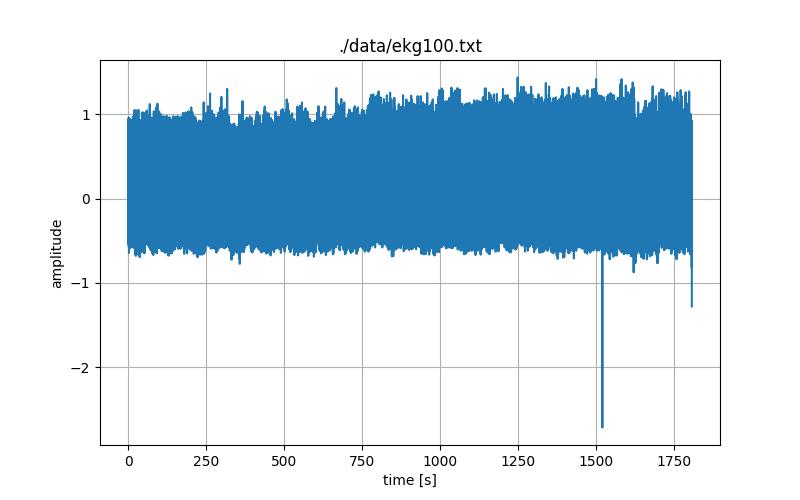

In [9]:
fs = 360 

file = './data/ekg100.txt'
data = np.loadtxt(file)
measurements = len(data)
amplitudes = data
time = [x / fs for x in range(measurements)]

plot(time, amplitudes, file, 'time [s]', 'amplitude')

Z wykresu można wywnioskować, że sygnał nie jest idealny. Zgodnie z oczekiwaniami, bo w rzeczywistości żaden sygnał nie jest wolny od zakłóceń, wystąpiły zaburzenia, szumy. Poprzez wykonanie dyskretnej transformaty Fouriera będzie można dokładniej przeanalizować wczytany sygnał.

### 2. Wyznaczyć jego dyskretną transformatę Fouriera i przedstawić widmo amplitudowe sygnału w funkcji częstotliwości w zakresie [0, fs/2], gdzie fs oznacza częstotliwość próbkowania.

<IPython.core.display.Javascript object>


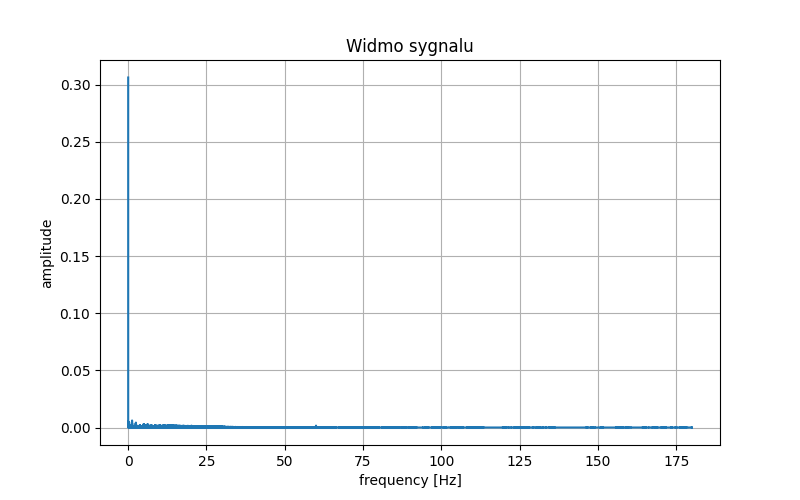

In [10]:
length = len(amplitudes)
fft = np.fft.fft(amplitudes) / length
fft_abs = np.abs(fft)
frequencies = fs * np.arange(length) / length

half = int(length/2)

plot(frequencies[0:half], fft_abs[0:half], f'Widmo sygnalu', 'frequency [Hz]', 'amplitude')

Z widma wynika, że w sygnale znajdują się składowe o częstotliwościach w całym zakresie częstotliwośći. Najmocniejsze składowe mają częstotliwości między 0 a 30 Hz. Po odpowiednim przybliżeniu, doskonale widać szumy zawarte w sygnale. Widoczne są również składowe harmoniczne. Mają one amplitudy znacząco większe od średniej amplitudy sygnału. Niepokojący wydaje się wykryty sygnał z częstotliwością nieco powyżej zera, na wykresie osiągający amplitudę powyżej 0,3. Jest to sygnał składowy, który prawdopodobnie nie powinien wystąpić w badanym sygnale.

### 3. Wyznaczyć odwrotną dyskretną transformatę Fouriera ciągu wyznaczonego w punkcie 2 i porównać otrzymany ciąg próbek z pierwotnym sygnałem ekg100 (można wyznaczyć różnicę sygnałów).

<IPython.core.display.Javascript object>


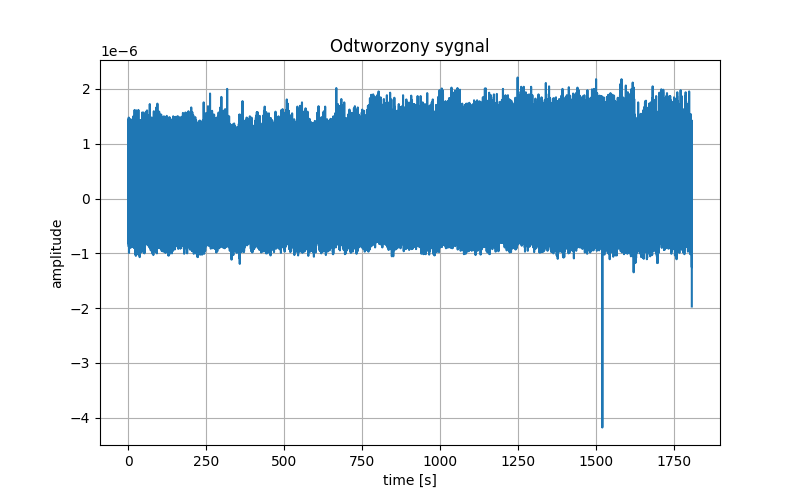

In [11]:
reversed_amplitudes = np.fft.ifft(fft).real

plot(time, reversed_amplitudes, f'Odtworzony sygnal', 'time [s]', 'amplitude')

Odtworzony sygnał przypomina kształtem pierwotny, zmianie uległa jedynie skala na osi Y.

<IPython.core.display.Javascript object>


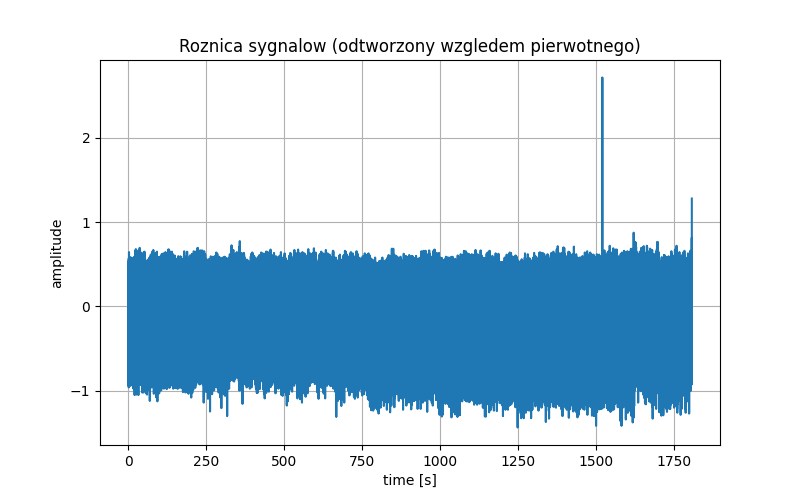

In [12]:
diff = reversed_amplitudes - amplitudes

plot(time, diff, f'Roznica sygnalow (odtworzony wzgledem pierwotnego)', 'time [s]', 'amplitude')